# Climate-Driven Disease Outbreak Prediction 

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

## Load The Dataset

In [2]:
df = pd.read_csv("../Data/climate_disease_dataset.csv")

## Explore The Dataset

In [3]:
# Check first few rows
print("Preview of dataset:")
display(df.head())

Preview of dataset:


,year,month,country,region,avg_temp_c,precipitation_mm,air_quality_index,uv_index,malaria_cases,dengue_cases,population_density,healthcare_budget
0,2000,1,American Samoa,East,24.046880,275.221450,32.664808,10.092419,7,36,289,4667
1,2000,2,American Samoa,East,27.865871,257.518897,6.549863,9.489863,136,120,289,4667
2,2000,3,American Samoa,East,27.185394,118.270513,26.385328,12.000000,53,79,289,4667
3,2000,4,American Samoa,East,25.036525,179.148943,12.735504,12.000000,34,82,289,4667
4,2000,5,American Samoa,East,24.675325,228.473663,10.127494,12.000000,85,128,289,4667


In [4]:
# Info about columns and datatypes
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34560 entries, 0 to 34559
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                34560 non-null  int64  
 1   month               34560 non-null  int64  
 2   country             34560 non-null  object 
 3   region              34560 non-null  object 
 4   avg_temp_c          34560 non-null  float64
 5   precipitation_mm    34560 non-null  float64
 6   air_quality_index   34560 non-null  float64
 7   uv_index            34560 non-null  float64
 8   malaria_cases       34560 non-null  int64  
 9   dengue_cases        34560 non-null  int64  
 10  population_density  34560 non-null  int64  
 11  healthcare_budget   34560 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 3.2+ MB
None


In [5]:
# Descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,year,month,avg_temp_c,precipitation_mm,air_quality_index,uv_index,malaria_cases,dengue_cases,population_density,healthcare_budget
count,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000
mean,2011.500000,6.500000,20.395234,192.667977,43.787766,10.210855,70.519560,75.941464,266.900000,2764.650000
std,6.922287,3.452102,8.410940,90.503990,33.079697,1.936540,46.130774,37.323807,136.001073,1418.119148
min,2000.000000,1.000000,-2.557056,0.000000,0.000000,0.870704,0.000000,0.000000,50.000000,205.000000
25%,2005.750000,3.750000,14.404089,124.641424,15.322767,8.921094,32.000000,48.000000,136.250000,1435.500000
50%,2011.500000,6.500000,20.351749,195.315309,40.685931,10.760990,69.000000,76.000000,277.500000,2859.000000
75%,2017.250000,9.250000,26.342978,260.147603,68.402041,12.000000,107.000000,104.000000,384.750000,3996.750000
max,2023.000000,12.000000,44.583564,485.704079,168.847690,12.000000,201.000000,181.000000,498.000000,4969.000000


In [6]:
# Missing values check
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
year                  0
month                 0
country               0
region                0
avg_temp_c            0
precipitation_mm      0
air_quality_index     0
uv_index              0
malaria_cases         0
dengue_cases          0
population_density    0
healthcare_budget     0
dtype: int64


In [7]:
#Rows and columns
print(df.shape)

(34560, 12)


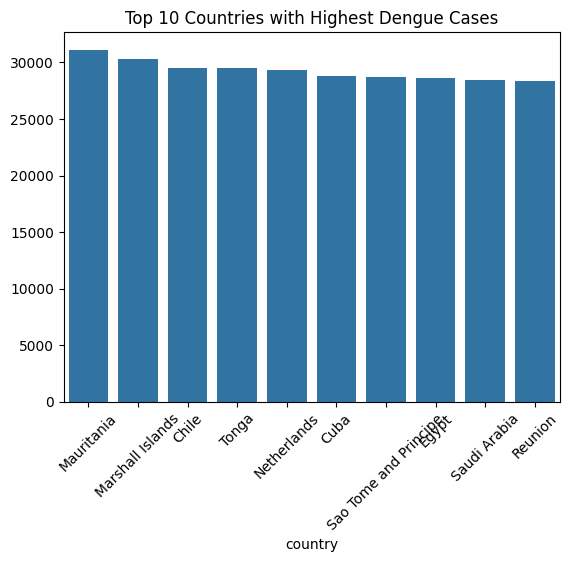

In [8]:
#Univariate Varible
# Top 10 Countries with Most Cases 
top10 = df.groupby("country")["dengue_cases"].sum().nlargest(10)
sns.barplot(x=top10.index, y=top10.values)
plt.title("Top 10 Countries with Highest Dengue Cases")
plt.xticks(rotation=45)
plt.show()

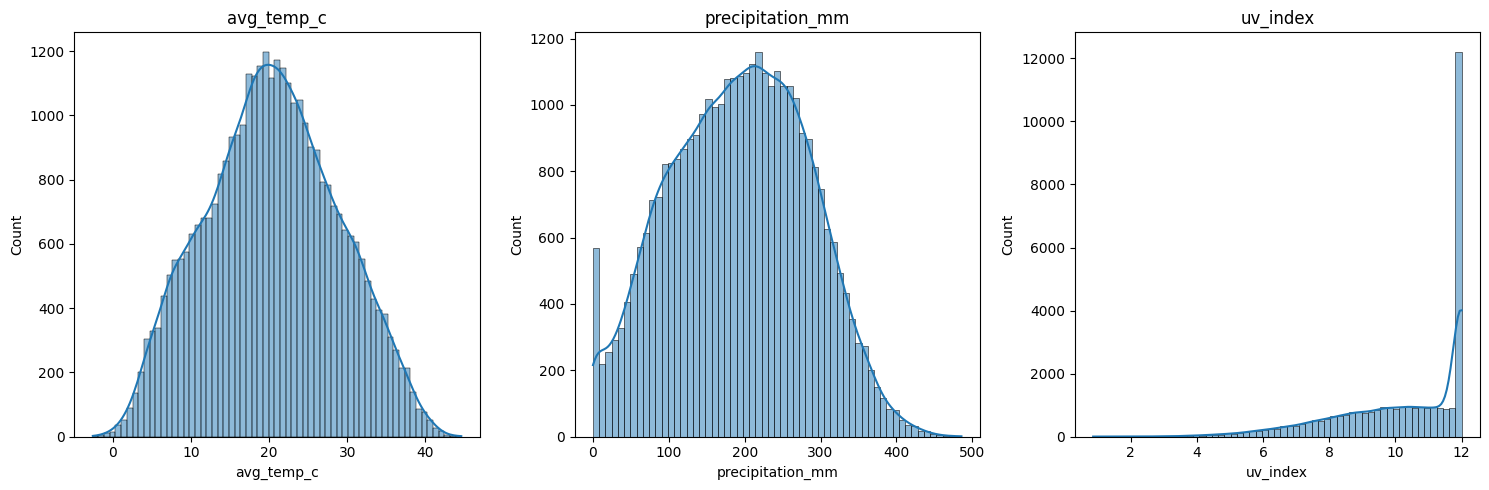

In [9]:
num_cols = ["avg_temp_c", "precipitation_mm", "uv_index"]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

<Axes: xlabel='dengue_cases', ylabel='avg_temp_c'>

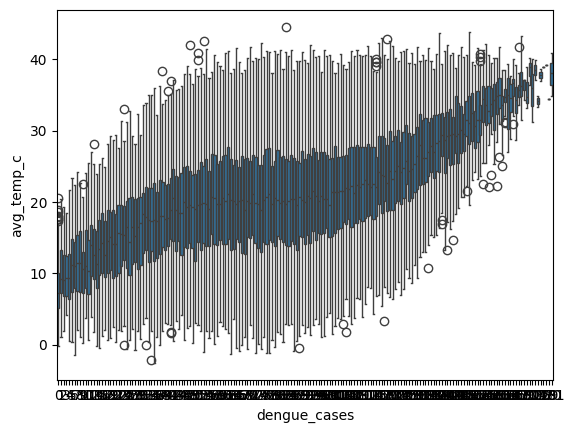

In [10]:
#Bivariate Analysis
sns.boxplot(x="dengue_cases", y="avg_temp_c", data=df)

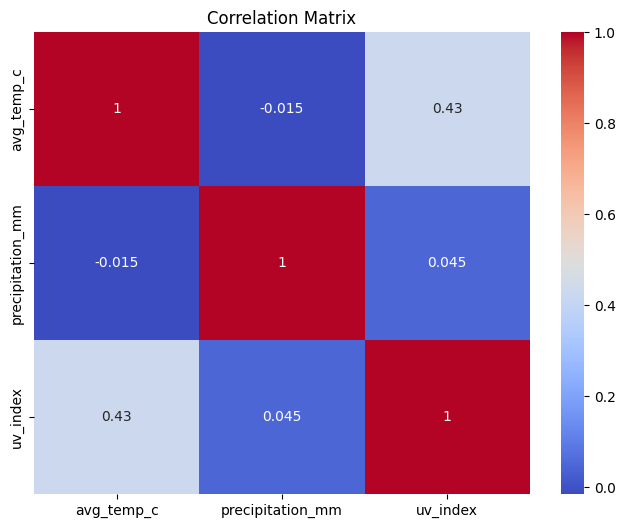

In [11]:
#Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

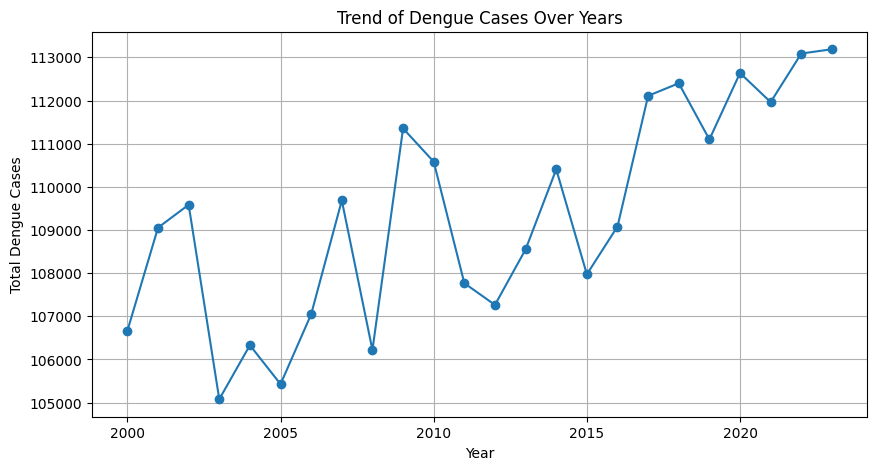

In [12]:
# Trend of Dengue Cases over Years
yearly_dengue = df.groupby("year")["dengue_cases"].sum()

plt.figure(figsize=(10,5))
plt.plot(yearly_dengue.index, yearly_dengue.values, marker="o")
plt.title("Trend of Dengue Cases Over Years")
plt.xlabel("Year")
plt.ylabel("Total Dengue Cases")
plt.grid(True)
plt.show()

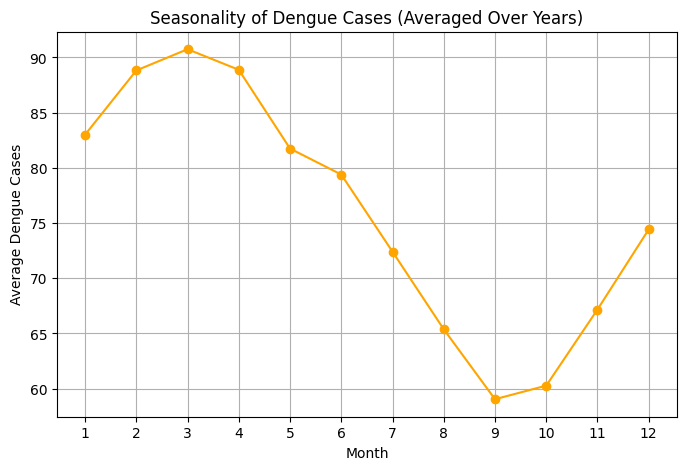

In [13]:
# Seasonal Trend of Dengue Cases
monthly_avg_dengue = df.groupby("month")["dengue_cases"].mean()

plt.figure(figsize=(8,5))
plt.plot(monthly_avg_dengue.index, monthly_avg_dengue.values, marker="o", color="orange")
plt.title("Seasonality of Dengue Cases (Averaged Over Years)")
plt.xlabel("Month")
plt.ylabel("Average Dengue Cases")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

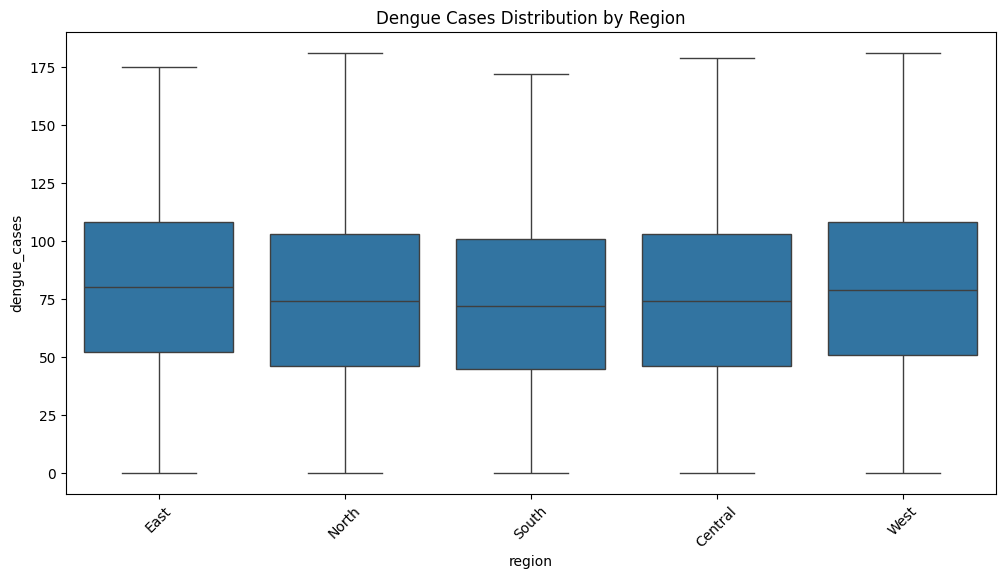

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x="region", y="dengue_cases", data=df)
plt.xticks(rotation=45)
plt.title("Dengue Cases Distribution by Region")
plt.show()

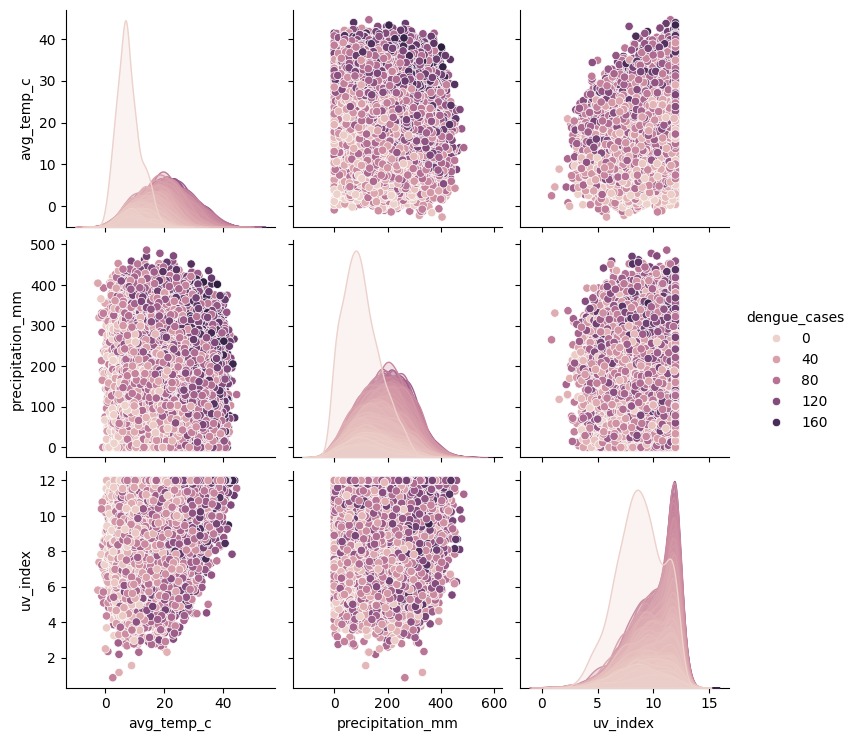

In [15]:
#Pair Plot
sns.pairplot(df, vars=num_cols, hue="dengue_cases")
plt.show()

In [16]:
#Encoding Categorical Values
le = LabelEncoder()
df["country"] = le.fit_transform(df["country"])
df["region"] = le.fit_transform(df["region"])

In [17]:
# Feature / Target Selection
X = df.drop("dengue_cases", axis=1)  # features
y = df["dengue_cases"]              # target
feature_order = ["avg_temp_c", "precipitation_mm", "uv_index", "air_quality_index"]


In [18]:
# Splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[feature_order])
X_test_scaled = scaler.transform(X_test[feature_order])

In [20]:
# Model Selection and Training
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train) 

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Mean Squared Error (MSE): 1100.488561255787
Mean Absolute Error (MAE): 28.46435185185185
R² Score: 0.22702375222532778


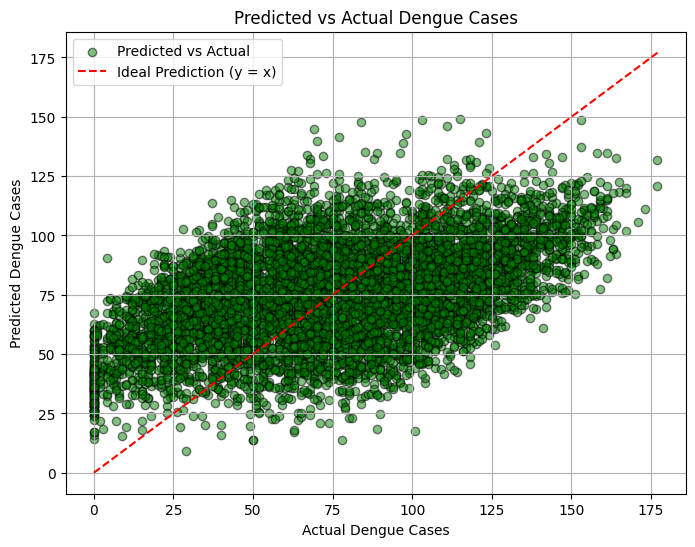

In [21]:
# Model Evaluation
y_pred = rf.predict(X_test_scaled)
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"R² Score: {r2_score(y_test, y_pred)}")

# Predicted vs Actual Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="green", edgecolor="k", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Prediction (y = x)")
plt.xlabel("Actual Dengue Cases")
plt.ylabel("Predicted Dengue Cases")
plt.title("Predicted vs Actual Dengue Cases")
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Hyperparameter Tuning and optimization
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10],
}

# Set up RandomizedSearchCV with parallel processing
random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=4, 
    cv=5,
    scoring='r2',
    n_jobs=-1,  
    random_state=42
)

random_search.fit(X_train_scaled, y_train)

# Get the best model
best_rf = random_search.best_estimator_

print(f"Best Parameters Found: {random_search.best_params_}")

# Evaluate the tuned model on test set
y_pred_tuned = best_rf.predict(X_test_scaled)

print(f"Tuned Model R² Score on Test Set: {r2_score(y_test, y_pred_tuned):.4f}")

Best Parameters Found: {'n_estimators': 150, 'max_depth': 10}
Tuned Model R² Score on Test Set: 0.2782


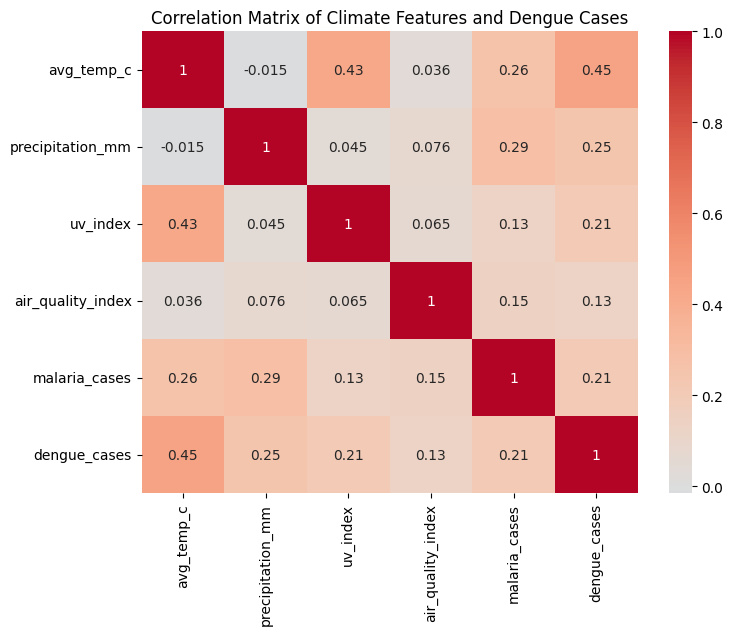

                   avg_temp_c  precipitation_mm  uv_index  air_quality_index  \
avg_temp_c           1.000000         -0.015348  0.425900           0.036301   
precipitation_mm    -0.015348          1.000000  0.045008           0.075877   
uv_index             0.425900          0.045008  1.000000           0.065294   
air_quality_index    0.036301          0.075877  0.065294           1.000000   
malaria_cases        0.259014          0.285629  0.132725           0.146599   
dengue_cases         0.451270          0.245269  0.209896           0.130763   

                   malaria_cases  dengue_cases  
avg_temp_c              0.259014      0.451270  
precipitation_mm        0.285629      0.245269  
uv_index                0.132725      0.209896  
air_quality_index       0.146599      0.130763  
malaria_cases           1.000000      0.206398  
dengue_cases            0.206398      1.000000  


In [23]:
# Corelation Matrix ( with encoded variables)
num_cols = ['avg_temp_c', 'precipitation_mm', 'uv_index', 'air_quality_index', 'malaria_cases']
corr_matrix = df[num_cols + ['dengue_cases']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmax=1, center=0)
plt.title("Correlation Matrix of Climate Features and Dengue Cases")
plt.show()

print(corr_matrix)

In [24]:
# Model Saving
joblib.dump(best_rf, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']